# Daily Data Science 002

This one is for the Numpy Library learning some advance topics and functions.

## Importing the Library

In [1]:
import numpy as np

# Numpy Advance Topics

## Numpy array v/s Python List

In [2]:
# Creation Speed Comparison
import time
# In Numpy
start = time.time()
a = np.random.randint(0, 1000000000, size=10000000) # create an array of 10 million random integers between 0 and 10 million
end = time.time()
print("Numpy array creation time:", end - start)

# In Python
start = time.time()
b = [np.random.randint(0, 1000000000) for _ in range(10000000)] # create a list of 10 million random integers between 0 and 10 million
end = time.time()
print("Python list creation time:", end - start)

Numpy array creation time: 0.2104334831237793
Python list creation time: 32.536211013793945


In [3]:
# element-wise addition of two arrays
from numpy import delete


a = np.random.randint(0, 1000000000, size=10000000)
b = np.random.randint(0, 1000000000, size=10000000)
start = time.time()
c = a + b
end = time.time()
print("Numpy array addition time:", end - start)

# element-wise addition of two lists
a = [np.random.randint(0, 1000000000) for _ in range(10000000)]
b = [np.random.randint(0, 1000000000) for _ in range(10000000)]
start = time.time()
c = [a[i] + b[i] for i in range(len(a))]
end = time.time()
print("Python list addition time:", end - start)

Numpy array addition time: 0.06485319137573242
Python list addition time: 1.0426530838012695


In [4]:
import sys

a = np.random.randint(0, 1000000000, size=10000000)
b = [np.random.randint(0, 1000000000) for _ in range(10000000)]

# correct ways to get sizes
print("numpy array size (bytes):", a.nbytes)  # use ndarray.nbytes
print("python list shallow size (bytes):", sys.getsizeof(b))  # list object + pointers
print("python list approx total size (bytes):", sys.getsizeof(b) + len(b) * sys.getsizeof(b[0]))

numpy array size (bytes): 80000000
python list shallow size (bytes): 89095160
python list approx total size (bytes): 369095160


Thus, Numpy performs better than Lists.... although numpy arrays cannot be homogenous.

## Advanced Indexing

In [5]:
# Fancy Indexing and Boolean Indexing
a = np.random.randint(0, 100, size=24).reshape(6, 4)
a

array([[11, 74, 28, 78],
       [27, 81,  2, 17],
       [33, 93, 81, 23],
       [11, 66, 73, 60],
       [71, 59, 52, 86],
       [ 5, 20, 44, 53]])

In [6]:
# Fancy Indexing
print(a[[0, 1, 2, 4]]) # select rows at index 0, 1, 2 and 4
print()
print(a[:, [1, 3]]) # select columns at index 1 and 3

[[11 74 28 78]
 [27 81  2 17]
 [33 93 81 23]
 [71 59 52 86]]

[[74 78]
 [81 17]
 [93 23]
 [66 60]
 [59 86]
 [20 53]]


In [7]:
# Boolean Indexing or Boolean Masking
# a > 50 # this will return a boolean array of the same shape as a with True for elements greater than 50 and False for elements less than or equal to 50
print(a[a > 50]) # this will return a 1D array of all the

[74 78 81 93 81 66 73 60 71 59 52 86 53]


## Broadcasting

> This is the special feature of the numpy.

The term broadcasting describes how NumPy treats arrays with different shapes during the arithmetic operations. The smaller array is "broadcast" to the larger array so that they have compatible shapes.

In [8]:
# it works normally with the same shaped Arrays a[2,3] + b[2,3] = c[2,3]

# but what about the scenario where the shapes are different ?

a = np.arange(27).reshape(9,3)
b = np.arange(3).reshape(1,3)
print(a)
print()
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]]

[[0 1 2]]


In [9]:
b + a # Possible via the broadcasting

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10],
       [ 9, 11, 13],
       [12, 14, 16],
       [15, 17, 19],
       [18, 20, 22],
       [21, 23, 25],
       [24, 26, 28]])

Rules for the Broadcasting -

1. Make the 2 arrays have the same number of dimension.
2. Make Each dimension of the Arrays the same size.

`Needs to have same shape, then choose 1 from (R,C) then add more to that... if not present it's not possible.`

## Working with Mathematical Formulas

In [10]:
# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

a = np.array([-1, 0, 1, 2, 3])
print(sigmoid(a))

[0.26894142 0.5        0.73105858 0.88079708 0.95257413]


In [11]:
# mean squared error loss function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
y_true = np.array([1, 2, 3])
y_pred = np.array([1.5, 2.5, 3.5])
print(mse(y_true, y_pred))

0.25


In [12]:
# categorical cross-entropy loss function
def categorical_crossentropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred))

y_true = np.array([0, 1, 0]) # one-hot encoded true labels
y_pred = np.array([0.1, 0.8, 0.1]) # predicted probabilities
print(categorical_crossentropy(y_true, y_pred))

0.2231435513142097


## Handling Missing Data

In [13]:
# Let's first create an array with missing values
a = np.array([1, 2, np.nan, 4, 5])
print("Original array:", a)

# Now we can use np.isnan() to create a boolean mask of the missing values
mask = np.isnan(a)
print("Boolean mask for NaN values:", mask)

Original array: [ 1.  2. nan  4.  5.]
Boolean mask for NaN values: [False False  True False False]


In [14]:
# NumPy provides a convenient way to filter out the missing values using this mask
filtered_a = a[~mask] # this will return a new array with only the non-missing values
print("Filtered array without NaN values:", filtered_a)

# It also provides functions to handle missing values, such as np.nanmean() to compute the mean while ignoring NaN values
mean_value = np.nanmean(a)
print("Mean value ignoring NaN:", mean_value)

Filtered array without NaN values: [1. 2. 4. 5.]
Mean value ignoring NaN: 3.0


## Plotting Graph

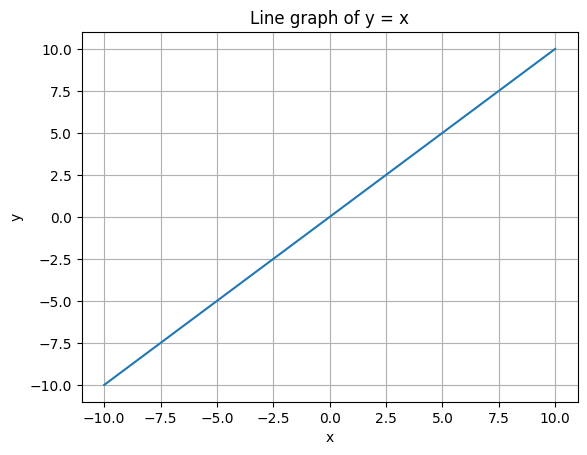

In [15]:
# to plot a simple x = y line graph
x = np.linspace(-10, 10, 100) # 100 points between -10 and 10
y = x # y = x line

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.title("Line graph of y = x")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

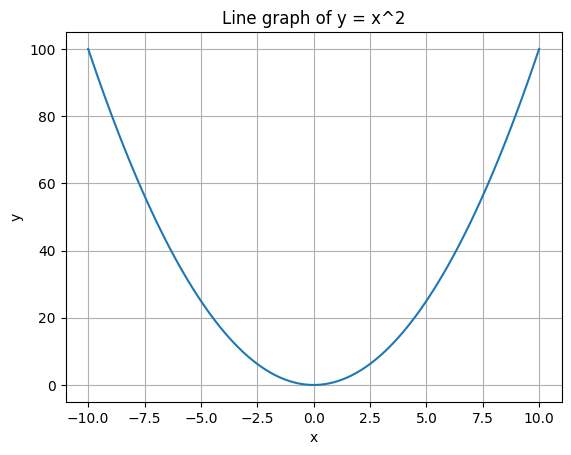

In [16]:
# y = x^2 line graph
y = x ** 2 # y = x^2 line
plt.plot(x, y)
plt.title("Line graph of y = x^2")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

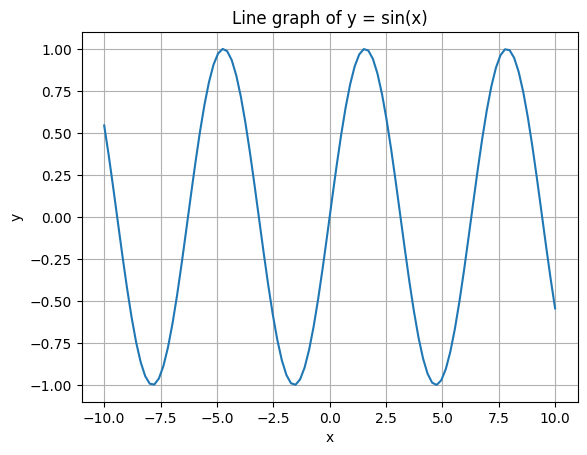

In [17]:
# y = sin(x) line graph
y = np.sin(x) # y = sin(x) line
plt.plot(x, y)
plt.title("Line graph of y = sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

/tmp/ipykernel_548532/740167265.py:2: RuntimeWarning: invalid value encountered in log
  y = x*np.log(x) # y = x*log(x) line


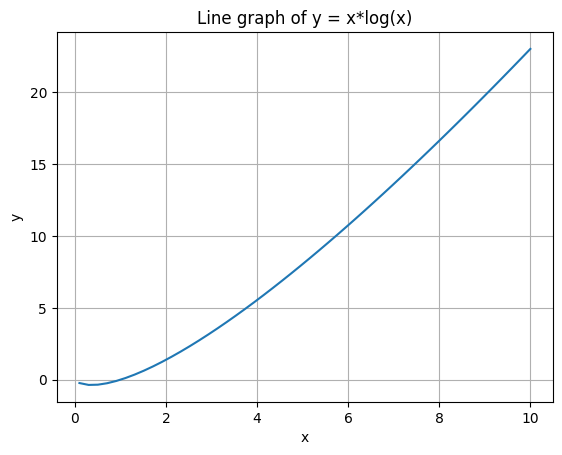

In [18]:
# y = log(x) line graph
y = x*np.log(x) # y = x*log(x) line
plt.plot(x, y)
plt.title("Line graph of y = x*log(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

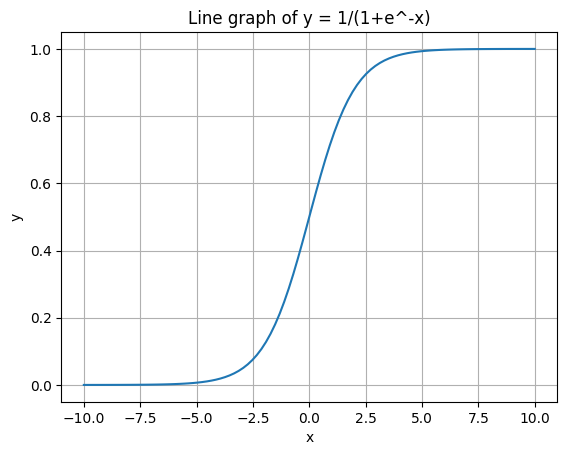

In [19]:
# y = 1/1+e^-x line graph
y = 1 / (1 + np.exp(-x)) # y = 1/(1+e^-x) line
plt.plot(x, y)
plt.title("Line graph of y = 1/(1+e^-x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

In [ ]:
import pandas as pd

pd.